In [ ]:
# install library untuk mengetahui berapa lama execution time tiap baris kode
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.36 s (started: 2021-07-27 15:58:38 +00:00)


In [ ]:
# aktifkan library yang dibutuhkan
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras import layers, Model
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

import os
import re
import string
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
# Koneksi ke Google Drive untuk penyimpanan file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.38 ms (started: 2021-07-27 15:58:41 +00:00)


In [ ]:
# pindah direktori ke folder utama
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks
time: 3.55 ms (started: 2021-07-27 15:58:41 +00:00)


In [ ]:
# mengunduh dataset yang telah disimpan sebelumnya
!curl -O http://alfianhid.000webhostapp.com/dataset_fix.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  940k  100  940k    0     0  1000k      0 --:--:-- --:--:-- --:--:--  999k
time: 1.05 s (started: 2021-07-27 15:58:41 +00:00)


In [ ]:
# mengubah dataset TXT menjadi format dataset tensor
raw_data_ds = tf.data.TextLineDataset(["dataset_fix.txt"])

time: 14.6 ms (started: 2021-07-27 15:58:42 +00:00)


In [ ]:
# menampilkan 10 baris data pertama
for elems in raw_data_ds.take(10):
    print(elems.numpy())

b'makanan bali di jogja makan malam di hari minggu ini yang enak enak dulu gaes tapi ini non halal ya gaes yang gak berkenan skip aja hehehe nah ini makannya di bu kadek khas bali yang ada di selokan mataram bagian kalasan sleman disini pesen menu sekaligus nasi campur spesial sate dan sate lilit harganya terjangkau kok gaes semuanya nasi campur spesialnya mantap dapet nasi trancam rica kecap sate lawar serta kuah sup rasanya bikin nagih nggak cukup porsi hahaha sate lilit nya gede gede seporsi dapat tusuk bisa buat lauk ataupun digadoin rasanya manis gurih dan bikin nagih juga muantap sate nya request pedes bumbunya meresap ke dalam dagingnya pedesnya masih enak nggak terlalu pedes overall semuanya recommended untuk dicoba menu di bukadekkhasbali bu kadek khas bali jl selokan mataram kadirojo purwomartani kalasan sleman diy selasa minggu '
b'makan emik dirumah bisa mau makan pas ppkm gini susah kalian bisa ke id gaes yang ada di condongcatur disini sudah support program ppkm dari peme

In [ ]:
# melakukan tokenisasi: memotong kalimat menjadi bentuk token-token kata
raw_data_ds= raw_data_ds.map(lambda x: tf.strings.split(x))

# menampilkan token-token kata pada kalimat baris ke-1
for elems in raw_data_ds.take(1):
    print(elems.numpy())

[b'makanan' b'bali' b'di' b'jogja' b'makan' b'malam' b'di' b'hari'
 b'minggu' b'ini' b'yang' b'enak' b'enak' b'dulu' b'gaes' b'tapi' b'ini'
 b'non' b'halal' b'ya' b'gaes' b'yang' b'gak' b'berkenan' b'skip' b'aja'
 b'hehehe' b'nah' b'ini' b'makannya' b'di' b'bu' b'kadek' b'khas' b'bali'
 b'yang' b'ada' b'di' b'selokan' b'mataram' b'bagian' b'kalasan' b'sleman'
 b'disini' b'pesen' b'menu' b'sekaligus' b'nasi' b'campur' b'spesial'
 b'sate' b'dan' b'sate' b'lilit' b'harganya' b'terjangkau' b'kok' b'gaes'
 b'semuanya' b'nasi' b'campur' b'spesialnya' b'mantap' b'dapet' b'nasi'
 b'trancam' b'rica' b'kecap' b'sate' b'lawar' b'serta' b'kuah' b'sup'
 b'rasanya' b'bikin' b'nagih' b'nggak' b'cukup' b'porsi' b'hahaha' b'sate'
 b'lilit' b'nya' b'gede' b'gede' b'seporsi' b'dapat' b'tusuk' b'bisa'
 b'buat' b'lauk' b'ataupun' b'digadoin' b'rasanya' b'manis' b'gurih'
 b'dan' b'bikin' b'nagih' b'juga' b'muantap' b'sate' b'nya' b'request'
 b'pedes' b'bumbunya' b'meresap' b'ke' b'dalam' b'dagingnya' b'pede

In [ ]:
# melakukan proses flattening agar urutan kalimat per baris tetap sama sampai proses akhir
raw_data_ds=raw_data_ds.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(x))

# menampilkan 10 token kata pertama
for elems in raw_data_ds.take(10):
    print(elems.numpy())

b'makanan'
b'bali'
b'di'
b'jogja'
b'makan'
b'malam'
b'di'
b'hari'
b'minggu'
b'ini'
time: 39.2 ms (started: 2021-07-27 15:58:42 +00:00)


In [ ]:
# menampilkan kosa kata dari dataset
print("Jumlah keseluruhan kata (kosa kata): ",len(set(raw_data_ds.as_numpy_iterator())))

Jumlah keseluruhan kata (kosa kata):  12915
time: 9.7 s (started: 2021-07-27 15:58:42 +00:00)


In [ ]:
# atur jumlah input yang akan dimasukkan ke dimensional layer
input_sequence_size = 4

time: 1.12 ms (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# membuat proses windowing frasa (5 kata input + 1 kata output)
sequence_data_ds = raw_data_ds.window(input_sequence_size+1, drop_remainder=True)

# menampilkan 3 contoh hasil windowing frasa
for window in sequence_data_ds.take(3):
  print(list(window.as_numpy_iterator()))

[b'makanan', b'bali', b'di', b'jogja', b'makan']
[b'malam', b'di', b'hari', b'minggu', b'ini']
[b'yang', b'enak', b'enak', b'dulu', b'gaes']
time: 45.9 ms (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# menampilkan ukuran shape window dan tipe datanya
print(window) # ternyata shapenya masih kosong, maka dari itu harus diperbaiki

<_VariantDataset shapes: (), types: tf.string>
time: 789 µs (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# memperbaiki ukuran shape dari dataset windowing frasa
sequence_data_ds = sequence_data_ds.flat_map(lambda window: window.batch(5))

# menampilkan 3 contoh hasil windowing frasa beserta ukuran shapenya (4+1 = 5)
for elem in sequence_data_ds.take(3):
  print(elem)

tf.Tensor([b'makanan' b'bali' b'di' b'jogja' b'makan'], shape=(5,), dtype=string)
tf.Tensor([b'malam' b'di' b'hari' b'minggu' b'ini'], shape=(5,), dtype=string)
tf.Tensor([b'yang' b'enak' b'enak' b'dulu' b'gaes'], shape=(5,), dtype=string)
time: 43.3 ms (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# split/membagi dataset menjadi x (input) dan y (output)
sequence_data_ds = sequence_data_ds.map(lambda window: (window[:-1], window[-1:]))
X_train_ds_raw = sequence_data_ds.map(lambda X,y: X)
y_train_ds_raw = sequence_data_ds.map(lambda X,y: y)

time: 20.5 ms (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# mencoba melihat hasil proses windowing frasa secara lebih detail
print("Input berupa token kata \t\t    ----->\t Output berupa prediksi kata")
for elem1, elem2 in zip(X_train_ds_raw.take(3),y_train_ds_raw.take(3)):
   print(elem1.numpy(),"\t\t----->\t", elem2.numpy())

Input berupa token kata 		    ----->	 Output berupa prediksi kata
[b'makanan' b'bali' b'di' b'jogja'] 		----->	 [b'makan']
[b'malam' b'di' b'hari' b'minggu'] 		----->	 [b'ini']
[b'yang' b'enak' b'enak' b'dulu'] 		----->	 [b'gaes']
time: 79.6 ms (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# membuat fungsi konversi dataset yang awalnya berisi token-token menjadi string vector (satu frasa/kalimat utuh)
def convert_string(X: tf.Tensor):
  str1 = ""  
  for ele in X:
    str1 += ele.numpy().decode("utf-8")+" "
  str1= tf.convert_to_tensor(str1[:-1])
  return str1

time: 3.35 ms (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# menerapkan fungsi konversi dataset
X_train_ds_raw = X_train_ds_raw.map(lambda x: tf.py_function(func=convert_string,
          inp=[x], Tout=tf.string))

time: 7.98 ms (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# mencoba melihat hasil proses windowing frasa secara lebih detail
print("Input berupa string vector \t\t    ----->\t Output berupa prediksi kata")
for elem1, elem2 in zip(X_train_ds_raw.take(3),y_train_ds_raw.take(3)):
   print(elem1.numpy(),"\t\t----->\t", elem2.numpy())

Input berupa string vector 		    ----->	 Output berupa prediksi kata
b'makanan bali di jogja' 		----->	 [b'makan']
b'malam di hari minggu' 		----->	 [b'ini']
b'yang enak enak dulu' 		----->	 [b'gaes']
time: 87.8 ms (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# mencoba melihat ukuran awal dari X (data input)
print(X_train_ds_raw.element_spec, y_train_ds_raw.element_spec) # ternyata masih unknown, perlu diperbaiki

TensorSpec(shape=<unknown>, dtype=tf.string, name=None) TensorSpec(shape=(None,), dtype=tf.string, name=None)
time: 789 µs (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# menerapkan proses perbaikan (reshape ke bentuk 2D)
X_train_ds_raw = X_train_ds_raw.map(lambda x: tf.reshape(x,[1]))

time: 8.3 ms (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
X_train_ds_raw.element_spec, y_train_ds_raw.element_spec # oke, sudah benar

(TensorSpec(shape=(1,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.string, name=None))

time: 5.58 ms (started: 2021-07-27 15:58:52 +00:00)


In [ ]:
# mengatur parameter proses vektorisasi (mengubah teks menjadi angka)
max_features = 10000                             # jumlah kosa kata untuk dijadikan fitur
sequence_length = input_sequence_size            # jumlah input kata = 4
batch_size = 32                                  # ukuran Batch 

time: 1.34 ms (started: 2021-07-27 16:51:49 +00:00)


In [ ]:
# membuat layer vektorisasi teks
vectorize_layer = TextVectorization(
    max_tokens = max_features,
    output_mode = "int",
    output_sequence_length = sequence_length,
)

time: 10.7 ms (started: 2021-07-27 16:51:50 +00:00)


In [ ]:
# menerapkan fitur "adapt" agar kosa kata memiliki index/urutan nomor
vectorize_layer.adapt(raw_data_ds.batch(batch_size))

time: 2.82 s (started: 2021-07-27 16:51:50 +00:00)


In [ ]:
# menghitung jumlah kata
print("Jumlah keseluruhan kata (max fitur): ", len(vectorize_layer.get_vocabulary()))

Jumlah keseluruhan kata (max fitur):  10000
time: 20.2 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
print("Menampilkan index 10 kata pertama: ", vectorize_layer.get_vocabulary()[:10])

Menampilkan index 10 kata pertama:  ['', '[UNK]', 'dan', 'di', 'ada', 'yang', 'banget', 'ini', 'kalian', 'yg']
time: 18.1 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# mencoba menampilkan kata per index
vectorize_layer.get_vocabulary()[3]

'di'

time: 19.4 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# membuat fungsi vektorisasi teks
def vectorize_text(text):
  text = tf.expand_dims(text, -1)
  return tf.squeeze(vectorize_layer(text))

time: 1.88 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# menampilkan 3 hasil windowing frasa pertama
for elem in X_train_ds_raw.take(3):
  print("X: ",elem.numpy())

X:  [b'makanan bali di jogja']
X:  [b'malam di hari minggu']
X:  [b'yang enak enak dulu']
time: 76.3 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# menerapkan fungsi vektorisasi teks
X_train_ds = X_train_ds_raw.map(vectorize_text)
y_train_ds = y_train_ds_raw.map(vectorize_text)

time: 96.3 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# menampilkan 3 hasil windowing frasa pertama (setelah dilakukan vektorisasi teks)
for elem in X_train_ds.take(3):
  print("X: ",elem.numpy())

X:  [119 802   3  23]
X:  [173   3  91 265]
X:  [  5  13  13 231]
time: 83.6 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# menampilkan shape
X_train_ds_raw.element_spec, y_train_ds_raw.element_spec

(TensorSpec(shape=(1,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.string, name=None))

time: 5.22 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# saat kita coba memprediksi kata selanjutnya,
# ternyata output jumlah kata melebihi yang seharusnya
# oleh karena itu, perlu diperbaiki
for elem in y_train_ds.take(1):
  print("shape: ", elem.shape, "\n Index token kata selanjutnya: ",elem.numpy())

shape:  (4,) 
 Index token kata selanjutnya:  [15  0  0  0]
time: 75.8 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# menerapkan proses perbaikan
y_train_ds = y_train_ds.map(lambda x: x[:1])

time: 20 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# sekarang sudah benar
for elem in y_train_ds.take(1):
  print("shape: ", elem.shape, "\n Index token kata selanjutnya: ",elem.numpy())

shape:  (1,) 
 Index token kata selanjutnya:  [15]
time: 73.8 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# kita coba lihat dalam versi detail
for (X,y) in zip(X_train_ds.take(5), y_train_ds.take(5)):
  print(X.numpy(),"-->",y.numpy())

[119 802   3  23] --> [15]
[173   3  91 265] --> [7]
[  5  13  13 231] --> [12]
[ 50   7 521 398] --> [16]
[12  5 59  1] --> [3705]
time: 154 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# saat mencoba melihat shape X dan y ternyata masih unknown, perlu diperbaiki
train_ds =  tf.data.Dataset.zip((X_train_ds,y_train_ds))
train_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=<unknown>, dtype=tf.int64, name=None))

time: 15 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# membuat fungsi perbaikan shape
def _fixup_shape(X, y):
    X.set_shape([4])
    y.set_shape([1]) 
    return X, y

time: 2.57 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# menerapkan fungsi dan melihat hasilnya
train_ds = train_ds.map(_fixup_shape)
train_ds.element_spec

(TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 TensorSpec(shape=(1,), dtype=tf.int64, name=None))

time: 42.9 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# melihat shape, input, dan output secara mendetail
for el in train_ds.take(5):
  print(el)

(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([119, 802,   3,  23])>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([15])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([173,   3,  91, 265])>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([  5,  13,  13, 231])>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([12])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 50,   7, 521, 398])>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([16])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([12,  5, 59,  1])>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([3705])>)
time: 164 ms (started: 2021-07-27 16:51:53 +00:00)


In [ ]:
# mengatur konfigurasi untuk optimasi performa training
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(buffer_size=1000).batch(batch_size, drop_remainder=True).cache().prefetch(buffer_size=AUTOTUNE)

time: 5.64 ms (started: 2021-07-27 16:51:54 +00:00)


In [ ]:
# melihat shape dataset
train_ds.element_spec

(TensorSpec(shape=(32, 4), dtype=tf.int64, name=None),
 TensorSpec(shape=(32, 1), dtype=tf.int64, name=None))

time: 5.77 ms (started: 2021-07-27 16:51:54 +00:00)


In [ ]:
embedding_dim = 128  # Embedding dimension

time: 825 µs (started: 2021-07-27 16:51:54 +00:00)


In [ ]:
# define model 
# A integer input for vocab indices
inputs = tf.keras.Input(shape=(sequence_length), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality (embedding_dim)
x = layers.Embedding(max_features, embedding_dim)(inputs)
x = layers.LSTM(128, return_sequences=True)(x)
x = layers.Flatten()(x)
predictions = layers.Dense(max_features, activation='softmax')(x)
model_LSTM = tf.keras.Model(inputs, predictions,name="model_LSTM")

# compile model
model_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_LSTM.summary())

Model: "model_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 4, 128)            1280000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 4, 128)            131584    
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10000)             5130000   
Total params: 6,541,584
Trainable params: 6,541,584
Non-trainable params: 0
_________________________________________________________________
None
time: 281 ms (started: 2021-07-27 16:51:54 +00:00)


In [ ]:
H = model_LSTM.fit(train_ds, epochs=20)  # train model

Epoch 1/20
973/973 [==============================] - 49s 48ms/step - loss: 7.6845 - accuracy: 0.0206
Epoch 2/20
973/973 [==============================] - 13s 14ms/step - loss: 6.6891 - accuracy: 0.0353
Epoch 3/20
973/973 [==============================] - 13s 13ms/step - loss: 6.0231 - accuracy: 0.0641
Epoch 4/20
973/973 [==============================] - 14s 14ms/step - loss: 5.0752 - accuracy: 0.1235
Epoch 5/20
973/973 [==============================] - 13s 14ms/step - loss: 3.9069 - accuracy: 0.2671
Epoch 6/20
973/973 [==============================] - 13s 14ms/step - loss: 2.8482 - accuracy: 0.4462
Epoch 7/20
973/973 [==============================] - 13s 14ms/step - loss: 2.1041 - accuracy: 0.5804
Epoch 8/20
973/973 [==============================] - 14s 14ms/step - loss: 1.5790 - accuracy: 0.6810
Epoch 9/20
973/973 [==============================] - 14s 14ms/step - loss: 1.1937 - accuracy: 0.7595
Epoch 10/20
973/973 [==============================] - 14s 15ms/step - loss: 0.901

In [ ]:
# menyimpan model
model_LSTM.save('/content/drive/My Drive/Colab Notebooks/datasets/LSTM_model.h5', save_format="h5")

time: 1.46 s (started: 2021-07-27 16:58:42 +00:00)


In [ ]:
# me-load/menggunakan model
model_LSTM = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/datasets/LSTM_model.h5')

time: 446 ms (started: 2021-07-27 16:58:44 +00:00)


In [ ]:
# membuat fungsi sampling untuk memprediksi kata
def sample(preds, temperature=0.2):
    preds=np.squeeze(preds)
    
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

time: 5.04 ms (started: 2021-07-27 16:58:44 +00:00)


In [ ]:
# membuat fungsi text generation
def generate_text(model, seed_original, step):
    seed= vectorize_text(seed_original)
    decode_sentence(seed.numpy().squeeze())
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print("...Diversity:", diversity)
        seed= vectorize_text(seed_original).numpy().reshape(1,-1)
        
        generated = (seed)
        for i in range(step):
            #print(seed.shape)
            predictions=model.predict(seed)
            pred_max= np.argmax(predictions.squeeze())
            #print("pred_max: ", pred_max)
            next_index = sample(predictions, diversity)
            #print("next_index: ", next_index)
            generated = np.append(generated, next_index)
            seed= generated[-sequence_length:].reshape(1,sequence_length)
        decode_sentence(generated)

time: 8.09 ms (started: 2021-07-27 16:58:44 +00:00)


In [ ]:
# membuat fungsi decode kalimat
def decode_sentence (encoded_sentence):
  deceoded_sentence=[]
  for word in encoded_sentence:
    
    deceoded_sentence.append(vectorize_layer.get_vocabulary()[word])
  sentence= ' '.join(deceoded_sentence)
  print(sentence)
  return sentence

time: 4.19 ms (started: 2021-07-27 16:58:44 +00:00)


In [ ]:
generate_text(model_LSTM, "nasi goreng pedas enak", 100)

nasi goreng pedas enak
...Diversity: 0.2
nasi goreng pedas enak banget cuma yang langganan kalian bisa cari di kolom menu barunya id ini kemasannya tag teman kalian harga gala jajan lagi promo diskon semua menu di outlet dibandrol sampai rp yuk chicken via hotel udah banget gaes kalau kesini dimakan gratis [UNK] [UNK] [UNK] [UNK] [UNK] di jogja info ada promo boba promo hanya yang belum buka di jogja outlet boba spot spot baru ini disc ada disc cuma dan semua paling bisa juga di dekat store yang namanya reopening semarang imogiri satu loc nya mampir ke jogja di id ada spot store non harga nya cuma terjangkau perbiji nya
...Diversity: 0.5
nasi goreng pedas enak banget cuma yang langganan kalian bisa disini juga bisa kalian coba paket brown kukus yang lebih ada martabak pasarbiar bakmi yang suka dan manis juga harganya banyak banget yang gak bakmi rekomendasi manis kalo kesini aku cobain nyobain goreng dengan chasiu nasi goreng yang isi nasi goreng yang asin dan lagi disini lebih pilihan

In [ ]:
generate_text(model_LSTM, "warung cafe kopi favorit", 100)

warung cafe kopi favorit
...Diversity: 0.2
warung cafe kopi favorit km id puasa spesial dessert dengan dengan varian pedas yang ada di sebrang seturan tapi orang harga nya terjangkau lagi cuma ribuan breakfast [UNK] dan nasi nasi lemak nasi goreng nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi nasi
...Diversity: 0.5
warung cafe kopi favorit say nongkrong komen sih gurih special es teh sama disininyg es es kopi es cincau es kopi es mangga es dg es teh ini yg banget bumbunya [UNK] banget [UNK] [UNK] ini cabang tanggal cafe ini bakmie dijual di jogja jangan lupa es kambingnya es [UNK] es kopi es batu es dg yg segar ini penasaran yg mau bisa juga bisa mau kok bisa bisa ke makanan yang bisa kalian 

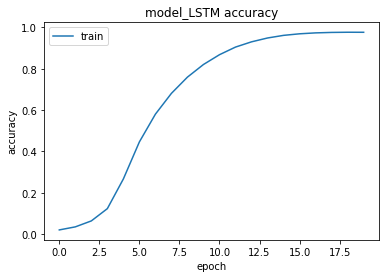

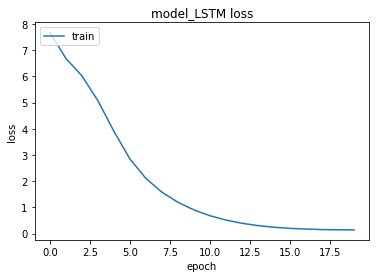

time: 2.48 s (started: 2021-07-27 16:59:06 +00:00)


In [ ]:
model_LSTM.evaluate(train_ds, batch_size=batch_size, verbose=0)

# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.title(model_LSTM.name+' accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.title(model_LSTM.name+' loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()